In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import fuzzywuzzy as fuzz
#from fuzzywuzzy import process

# Load the data CSVs

In [42]:
# Load full_output.csv
df = pd.read_csv('csv_files/full_output.csv')

# drop unnamed columns
df.drop(['Unnamed: 0'], axis=1, inplace=True)

# Load pml_output.csv
pml_df = pd.read_csv('csv_files/pml_output.csv')
pml_df.columns = pml_df.columns.str.strip()

## Set variables for filtering

In [43]:
year_list = list(df['Year'].unique())
class_list = list(df['Classification'].unique())
conf_list = list(df['Conference'].unique())

# Functions for analysis

In [44]:
def top_n_grabber(n=20, d=df, y=year_list, cl=class_list, co=conf_list):
    df_grabber = d
    df_grabber = df_grabber[pd.DataFrame(df_grabber.Year.to_list()).isin(y).any(1).values]
    df_grabber = df_grabber[pd.DataFrame(df_grabber.Classification.to_list()).isin(cl).any(1).values]
    df_grabber = df_grabber[pd.DataFrame(df_grabber.Conference.to_list()).isin(co).any(1).values]

    # Select each Selection into a list
    selection_1_list = df_grabber['Selection 1'].tolist()
    selection_2_list = df_grabber['Selection 2'].tolist()
    selection_3_list = df_grabber['Selection 3'].tolist()
    # combine selection 1, 2, and 3 into one dataframe
    full_selection_list = pd.DataFrame(selection_1_list + selection_2_list + selection_3_list)

    top_n_df = pd.DataFrame(full_selection_list.value_counts()[:n])
    top_n_df.columns = ['Count']
    top_n_df.reset_index(drop=False, inplace=True)
    top_n_df.columns = ['Selection', 'Count']
    top_n_df

    # make selection column into a list
    selection_list = top_n_df['Selection'].tolist()
    value_list = top_n_df['Count'].tolist()
    return selection_list, value_list

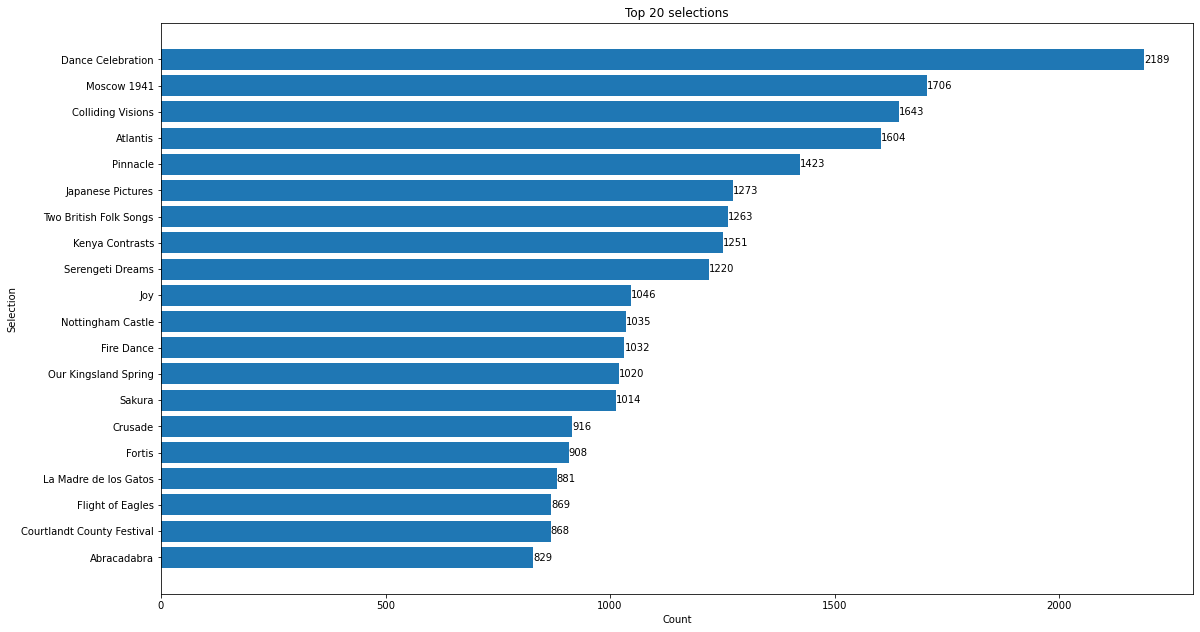

In [46]:
# Plot top n selections
def plotter(n=20, d=df, y=year_list, cl=class_list, co=conf_list):
    fig, ax = plt.subplots()
    bars = ax.barh(top_n_grabber(n, d, y, cl, co)[0], top_n_grabber(n, d, y, cl, co)[1])
    ax.set_title(f'Top {n} selections')
    ax.set_xlabel('Count')
    ax.set_ylabel('Selection')
    for bars in ax.containers:
        ax.bar_label(bars)
    # invert the y-axis
    ax.invert_yaxis()
   # reset size of the plot
    fig.set_size_inches(18.5, 10.5)

    plt.show()

plotter()

# Find Rows by Selection Title

In [47]:
# Combine all rows where any selection contains the search term
def selection_finder(selection, d=df, y=year_list, cl=class_list, co=conf_list):
    df_grabber = d
    df_grabber = df_grabber[pd.DataFrame(df_grabber.Year.to_list()).isin(y).any(1).values]
    df_grabber = df_grabber[pd.DataFrame(df_grabber.Classification.to_list()).isin(cl).any(1).values]
    df_grabber = df_grabber[pd.DataFrame(df_grabber.Conference.to_list()).isin(co).any(1).values]
    finder_df = df_grabber[(df_grabber['Selection 1'].str.contains(selection)) | (df_grabber['Selection 2'].str.contains(selection)) | (df_grabber['Selection 3'].str.contains(selection))]
    return finder_df

selection = 'Rocky Point'
year = [2019]
classification = class_list
conference = conf_list

selection_finder(selection, df, year, class_list, conf_list)

,School,City,Directors,Conference,Classification,Year,Stage Judge 1,Stage Judge 2,Stage Judge 3,Stage Final,SR Judge 1,SR Judge 2,SR Judge 3,SR Final,Award,Selection 1,Selection 2,Selection 3,Stage Average
45812,Vista Ridge High School,Cedar Park,Bryan Christian,AAAAAA,Varsity,2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A,Hail to the Spirit of Liberty,Till Eulenspiegel's Merry Pranks,Rocky Point Holiday,1.000000
46555,Copperas Cove High School,Copperas Cove,Tony Chapa,AAAAAA,Varsity,2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A,Sol Y Sombra,The Red Machine,Rocky Point Holiday,1.000000
46700,Klein High School,Spring,David Gresens,AAAAAA,Varsity,2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A,George Washington Bicentennial,Symphony for Band,Rocky Point Holiday,1.000000
47565,Nixon HS,Laredo,"Juan Gerardo Sosa / Hector Navarro, Mike Rodr...",AAAAAA,Varsity,2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A,Sol Y Sombra,Rocky Point Holiday,Armenian Dances Set I,1.000000
48716,Pebble Hills High School,"El Paso,",Maximo Sierra / Raul Chavira/Daniel Hunt/Ceci...,AAAAAA,Varsity,2019,1.0,1.0,2.0,1.0,2.0,1.0,1.0,1.0,A,Easter Monday On The White House Lawn,Danzon No 2,Rocky Point Holiday,1.333333
48904,Lebanon Trail HS,Frisco,Kelly Wykoff,AAAAA,Varsity,2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A,Commando March,Rocky Point Holiday,Southern Harmony,1.000000
49216,Dawson High School,Pearland,Aaron Brown,AAAAAA,Varsity,2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A,Entry of the Gladiators �Thunder and Blazes� M...,Rocky Point Holiday,Till Eulenspiegels lustige Streiche,1.000000
49506,Waxahachie High School,Waxahachie,"Rich Armstrong / Justin Bell, Reggie Cook, Pa...",AAAAAA,Varsity,2019,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,A,Entry March of the Boyars,Sketches on a Tudor Psalm,Rocky Point Holiday,1.000000


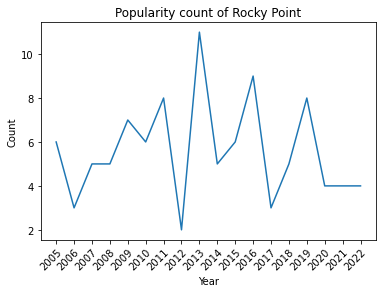

In [39]:
selection = 'Rocky Point'
yearly_count_values = []
selection_finder_df = df


for y in year_list:
    selection_finder_df = selection_finder(selection, df, [y], class_list, conf_list)
    yearly_count_values.append(len(selection_finder_df))

# make a line graph of the yearly count of selections
def yearly_count_plotter(yearly_count_values):
    fig, ax = plt.subplots()
    ax.plot(yearly_count_values)
    ax.set_title(f'Popularity count of {selection}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Count')
    # set number of ticks on x-axis to match len(year_list)
    ax.set_xticks(range(len(year_list)))
    # set x labels to year_list
    ax.set_xticklabels(year_list)
    # rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    plt.show()

yearly_count_plotter(yearly_count_values)

# Find Rows by Directors

In [53]:
def director_finder(director, df):
    finder_df = df[df['Directors'].str.contains(director)]
    return finder_df

director = 'Kevin MacDonald'
df_for_search = df

director_finder_df = director_finder(director, df_for_search)
director_finder_df.sort_values(by='Stage Average', ascending=False)

,School,City,Directors,Conference,Classification,Year,Stage Judge 1,Stage Judge 2,Stage Judge 3,Stage Final,SR Judge 1,SR Judge 2,SR Judge 3,SR Final,Award,Selection 1,Selection 2,Selection 3,Stage Average
47001,Sachse High School,Sachse,"John Robinson / Holly Taylor, Kevin MacDonald",AAAAAA,Sub Non-Varsity A,2019,2.0,2.0,3.0,2.0,1.0,1.0,2.0,1.0,2,Rough Riders,Gigue Francaise,Chanteys,2.333333
47002,Sachse High School,Sachse,"John Robinson / Holly Taylor, Kevin MacDonald",AAAAAA,Sub Non-Varsity B,2019,2.0,2.0,3.0,2.0,2.0,1.0,2.0,2.0,,Miss Liberty,Knights of Dunvegan,La Madre de los Gatos,2.333333
47000,Sachse High School,Garland,Kevin MacDonald / Holly Taylor/John Robinson,AAAAAA,Non-Varsity,2019,2.0,1.0,2.0,2.0,1.0,2.0,1.0,1.0,2,Sol Y Sombra,The Fire of Eternal Glory,Light Cavalry,1.666667
47003,Sachse HS Band,Sachse,"Holly Taylor / Kevin MacDonald, John Robinson",AAAAAA,Varsity,2019,2.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1,Rolling Thunder March,Divertimento for Winds and Percussion,Danzon No 2,1.666667
57186,Sachse High School,Garland,"Garrett Tucker / Holly Taylor, Kevin MacDonald",AAAAAA,Sub Non-Varsity B,2022,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,Valley Forge March,Japanese Pictures,Flight of Eagles,1.666667
39305,Sachse High School,Sachse,"John Robinson / Holly Taylor, Kevin MacDonald",AAAAAA,Sub Non-Varsity A,2017,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,,Big Four March,The Lowlands of Scotland,La Bonne Aventure,1.666667
39307,Sachse HS Band,Sachse,Kevin MacDonald / Holly Taylor/John Robinson,AAAAAA,Non-Varsity,2017,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,C,American Folk Rhapsody No 2,Redemption,Americans We,1.333333
42981,Sachse HS Band,Sachse,Holly Taylor / Kevin MacDonald and John Robinson,AAAAAA,Sub Non-Varsity B,2018,1.0,1.0,2.0,1.0,3.0,2.0,3.0,3.0,2,Omaha Beach Concert March,Legend of Knife River,Sketches of Canada,1.333333
35506,Sachse HS Band,Sachse,Kevin MacDonald / Holly Taylor/John Robinson,AAAAAA,Non-Varsity,2016,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,C,Men of Ohio,Fantasy on a Theme by Samual Barber,Choreography,1.333333
35504,Sachse High School,Sachse,"John Robinson / Holly Taylor, Kevin MacDonald",AAAAAA,Sub Non-Varsity A,2016,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,C,The Big Cage,Blue Ridge Saga,La Madre de los Gatos,1.333333


In [50]:
director_score = director_finder_df['Stage Average'].mean()
director_score

1.2333333333333332

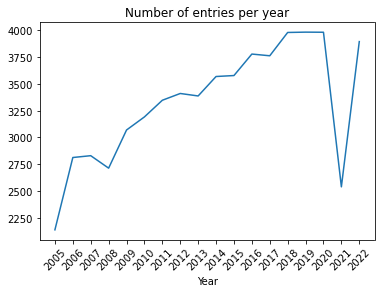

In [48]:
# Plot a line graph of the number of rows in each year
df_year_counter = df.groupby('Year').size()
df_year_counter.plot(kind='line')
plt.xticks(year_list)
plt.xticks(rotation=45)
plt.title('Number of entries per year')
plt.show()